## **Exercise 4:** Water Pollution
Water is usually formed by small pollution particles and some bacteria. However, the presence of big quantities of certain types of bacteria should turn on the alarms. For example, the presence of coliform bacteria, specifically **E. coli**, in drinking water suggests that it may contain pathogens that could cause diarrhoea, vomiting, cramps, nausea, headaches, fever, or fatigue.

Given that to classify and detect dangerous bacteria and harmful particles usually need a specialist and proper analysis equipment, this type of fieldwork has become expensive and sometimes unavailable in remote areas. Therefore, you will need to implement a way to automatically count and classify if a water microscope picture is drinkable or not.

The exercise's main purpose is to implement morphological image processing so you'll have to use at least four of the methods previously explained in the pre-processing step. On the other hand, you can use the counting and detection method of your selection (e.g. you can explore Generalised Hough Transform, cv2.findContours(), and cv2.drawContours()). For this exercise, you can use the following image: https://drive.google.com/file/d/1f5wnYfWC3Gag2Y7yx8yRUdprxONE-H5c/view?usp=sharing), which contains a microscope sample with ecoli bacteria. On the other hand, you also have the option to find other types of bacterias in a different image. When it's about finding image datasets, *Google Dataset Search* (https://datasetsearch.research.google.com/) is one of the most useful tools, so you can search for  bacteria image datasets and implement the tutorial with those images.

original


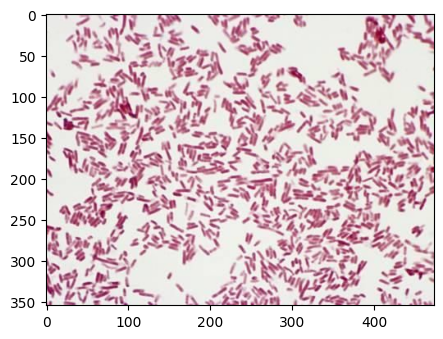

In [94]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("ecoli bacteria in water.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



base_image = np.copy(image)
print("original")
plt.figure(figsize=(5,5))
plt.imshow(base_image)




Text(0.5, 1.0, 'Distance Transform')

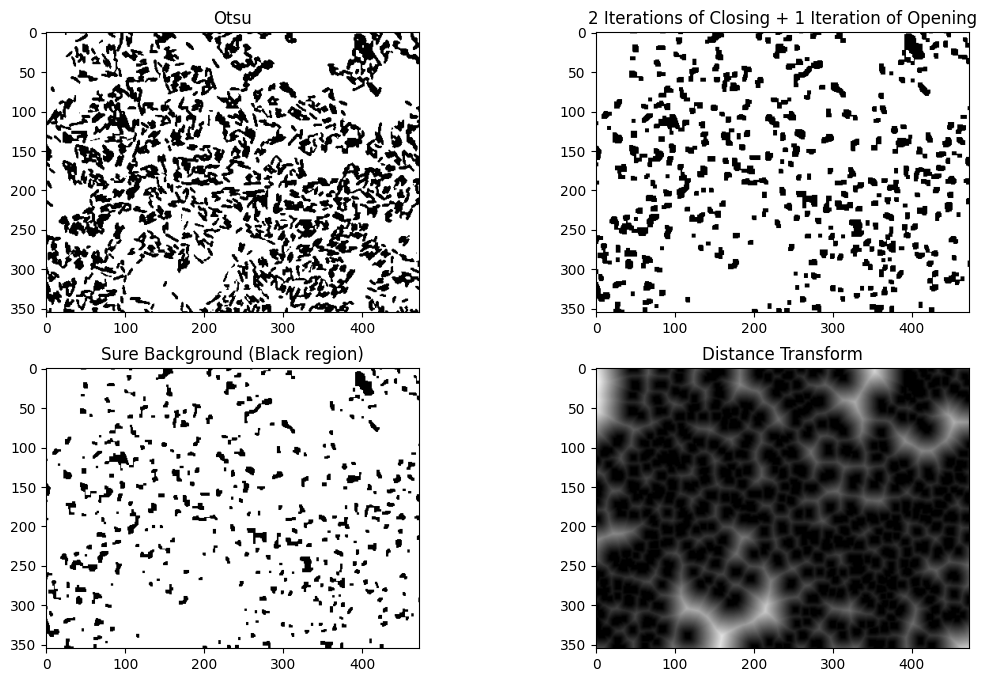

In [95]:
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grayscale,20,150,cv2.THRESH_OTSU)
structuring_element = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, structuring_element, iterations = 2)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, structuring_element, iterations = 1)

sure_bg = cv2.dilate(opening, structuring_element, iterations=1)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)


plt.rcParams["figure.figsize"] = (13,8)

# First row
fig, ax = plt.subplots(2,2)

ax[0][0].imshow(thresh, cmap = "gray")
ax[0][0].set_title("Otsu")
ax[0][1].imshow(opening, cmap = "gray")
ax[0][1].set_title("2 Iterations of Closing + 1 Iteration of Opening")

# Second row
ax[1][0].imshow(sure_bg, cmap = "gray")
ax[1][0].set_title("Sure Background (Black region)")
ax[1][1].imshow(dist_transform, cmap = "gray")
ax[1][1].set_title("Distance Transform")



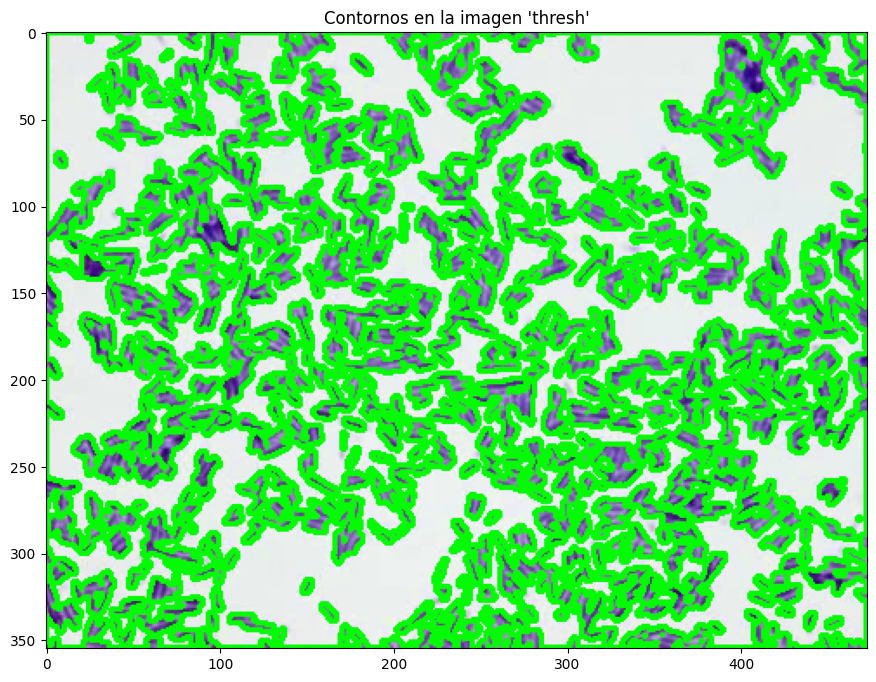

Número de contornos encontrados: 379


In [96]:
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contour_image = image.copy()

cv2.drawContours(contour_image, contours, -2, (5, 250, 5), 2) 

plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contornos en la imagen 'thresh'")
plt.show()
print(f"Número de contornos encontrados: {len(contours)}")
